
Links:
1. https://towardsdatascience.com/run-or-walk-detecting-user-activity-with-machine-learning-and-core-ml-part-1-9658c0dcdd90
    a. original guy article
2. https://towardsdatascience.com/run-or-walk-part-2-collecting-device-motion-data-the-right-way-58a277ff2087
    a. original guy article pt 2
3. 

Question - Ishita:
Is there a difference in the workouts during the workday vs the weekend? How important is weekday vs weekend important in terms of figuring out workout pattern

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

Kine_data = pd.read_csv('Kinematics_Data.csv')

In [2]:
Kine_data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [3]:
Kine_data['datetime'] = Kine_data['date'] + ' ' + Kine_data['time']

In [4]:
Kine_data['datetime'] = pd.to_datetime(Kine_data['datetime'], format = '%Y-%m-%d %H:%M:%S:%f')

In [5]:
Kine_data['gyro_mag'] = Kine_data['gyro_x']**2 + Kine_data['gyro_y']**2 + Kine_data['gyro_z']**2
Kine_data['gyro_mag'] = Kine_data['gyro_mag']**(1/2)

In [6]:
Kine_data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,datetime,gyro_mag
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,2017-06-30 13:51:15.847724020,2.930374
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,2017-06-30 13:51:16.246945023,0.217731
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,2017-06-30 13:51:16.446233987,2.603424
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,2017-06-30 13:51:16.646117985,2.964524
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,2017-06-30 13:51:16.846738994,2.530928


In [7]:
# putting in the days of the week numbers. Monday = 0, Sunday = 6
Kine_data['weekday'] = Kine_data['datetime'].dt.dayofweek

In [8]:
uniquedays = Kine_data['datetime'].map(pd.Timestamp.date).unique()

In [9]:
# Separating the weekdays
Kine_data_weekday = Kine_data[(Kine_data['weekday'] <= 4)]
# printing out which days are weekdays as a unique list
uniqueWeekday = Kine_data_weekday['datetime'].map(pd.Timestamp.date).unique()

In [10]:
# Separating the weekends
Kine_data_weekend = Kine_data[(Kine_data['weekday'] > 4)]
uniqueWeekend = Kine_data_weekend['datetime'].map(pd.Timestamp.date).unique()
uniqueWeekend

array([datetime.date(2017, 7, 15), datetime.date(2017, 7, 16),
       datetime.date(2017, 7, 1), datetime.date(2017, 7, 2),
       datetime.date(2017, 7, 9)], dtype=object)

In [11]:
# There are no Wednesday values in the data
Kine_data_Monday = Kine_data[(Kine_data['weekday'] == 0)]
Kine_data_Tuesday = Kine_data[(Kine_data['weekday'] == 1)]
Kine_data_Thursday = Kine_data[(Kine_data['weekday'] == 3)]
Kine_data_Friday = Kine_data[(Kine_data['weekday'] == 4)]
Kine_data_Saturday = Kine_data[(Kine_data['weekday'] == 5)]
Kine_data_Sunday = Kine_data[(Kine_data['weekday'] == 6)]

In [12]:
#Kine_data.info()

In [13]:
def plot_each_day(data,day_col,time_col,y_col,color='none'):
    days = data[day_col].unique()
    for day in days:
        day_data = data[data[day_col] == day]
        x = day_data[time_col]
        y = day_data[y_col]
        if color == 'none':
            plt.scatter(x,y)
        else:
            colors = {0:'pink',1:'turquoise'}
            plt.scatter(x,y,c=day_data[color].map(colors))
        plt.title(day)
        plt.show()
        print(day_data[time_col].max() - day_data[time_col].min())
    return

In [14]:
'''
walk_data = Kine_data[Kine_data['activity'] == 0]
leftwrist_walk = walk_data[walk_data['wrist'] == 0]
rightwrist_walk = walk_data[walk_data['wrist'] == 1]
run_data = Kine_data[Kine_data['activity'] == 1]
leftwrist_run = run_data[run_data['wrist'] == 0]
rightwrist_run = run_data[run_data['wrist'] == 1]
'''

"\nwalk_data = Kine_data[Kine_data['activity'] == 0]\nleftwrist_walk = walk_data[walk_data['wrist'] == 0]\nrightwrist_walk = walk_data[walk_data['wrist'] == 1]\nrun_data = Kine_data[Kine_data['activity'] == 1]\nleftwrist_run = run_data[run_data['wrist'] == 0]\nrightwrist_run = run_data[run_data['wrist'] == 1]\n"

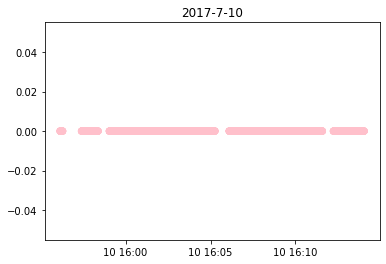

0 days 00:17:55.380331


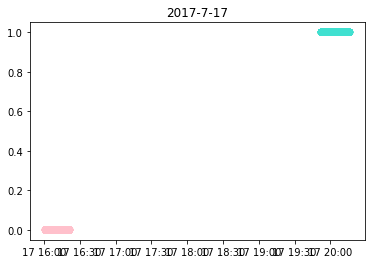

0 days 04:14:51.302457


In [15]:
plot_each_day(Kine_data_Monday,'date','datetime','activity', color = 'activity')

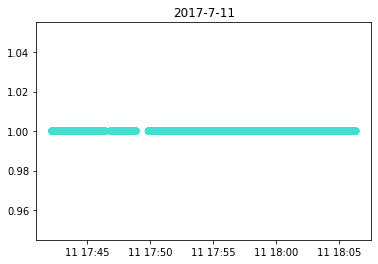

0 days 00:24:07.801546


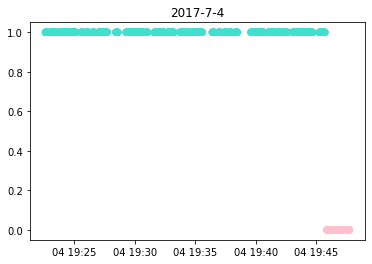

0 days 00:25:10.962275


In [16]:
plot_each_day(Kine_data_Tuesday,'date','datetime','activity', color = 'activity')

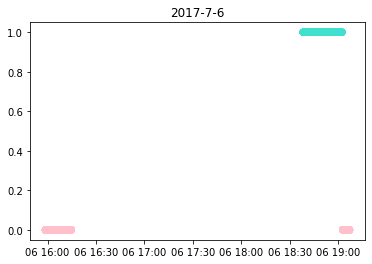

0 days 03:08:37.349506


In [17]:
plot_each_day(Kine_data_Thursday,'date','datetime','activity', color = 'activity')

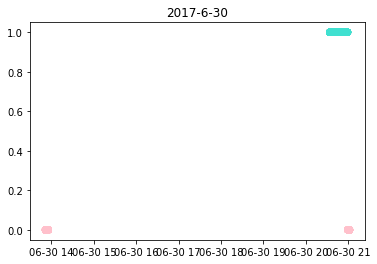

0 days 07:10:52.959546


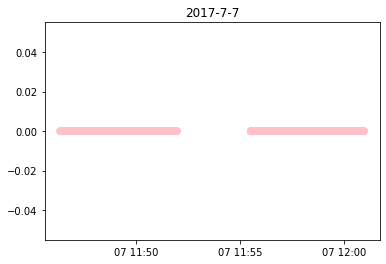

0 days 00:14:41.070348


In [18]:
plot_each_day(Kine_data_Friday,'date','datetime','activity', color = 'activity')

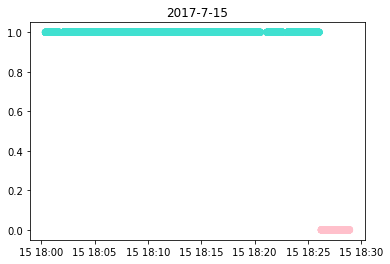

0 days 00:28:31.710533


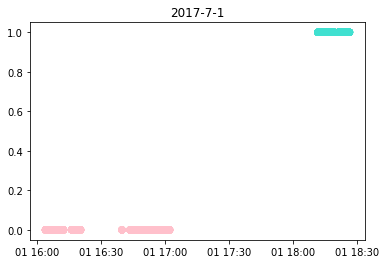

0 days 02:22:53.772888


In [19]:
plot_each_day(Kine_data_Saturday,'date','datetime','activity', color = 'activity')

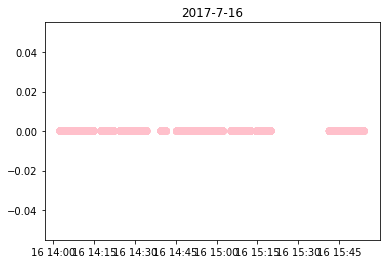

0 days 01:51:40.117413


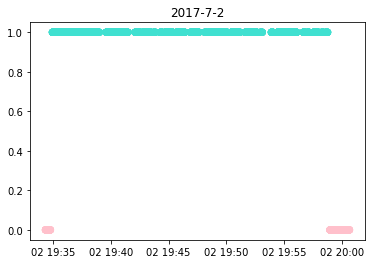

0 days 00:26:20.711409


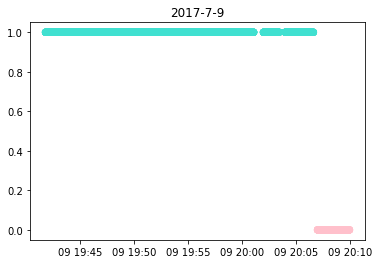

0 days 00:28:11.710830


In [20]:
plot_each_day(Kine_data_Sunday,'date','datetime','activity', color = 'activity')

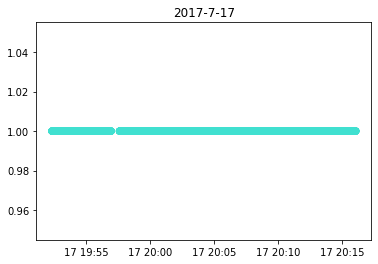

0 days 00:23:46.416456


In [33]:
plot_each_day(Kine_data_Monday[(Kine_data_Monday['activity'] == 1)],'date','datetime','activity', color = 'wrist')

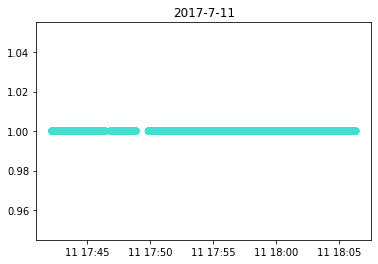

0 days 00:24:07.801546


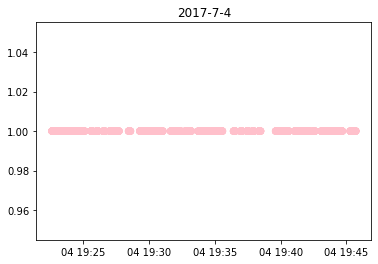

0 days 00:23:08.394617


In [34]:
plot_each_day(Kine_data_Tuesday[(Kine_data_Tuesday['activity'] == 1)],'date','datetime','activity',  color = 'wrist')

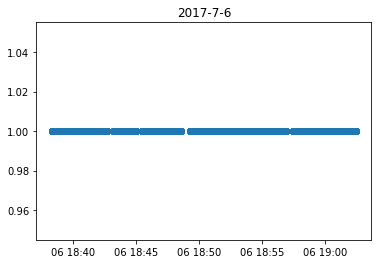

0 days 00:24:08.170455


In [23]:
plot_each_day(Kine_data_Thursday[(Kine_data_Thursday['activity'] == 1)],'date','datetime','activity')

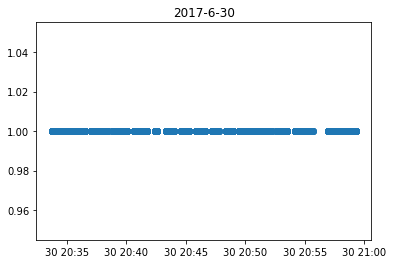

0 days 00:25:33.166062


In [24]:
plot_each_day(Kine_data_Friday[(Kine_data_Friday['activity'] == 1)],'date','datetime','activity')

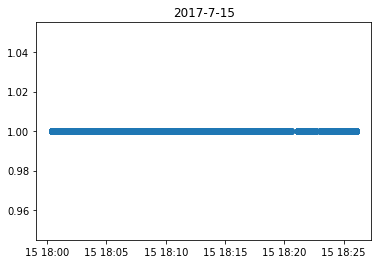

0 days 00:25:40.252032


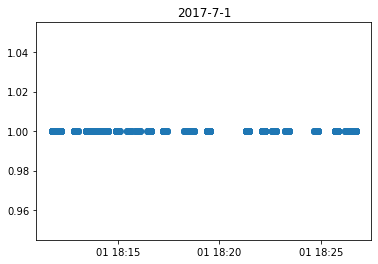

0 days 00:15:00.133388


In [25]:
plot_each_day(Kine_data_Saturday[(Kine_data_Saturday['activity'] == 1)],'date','datetime','activity')

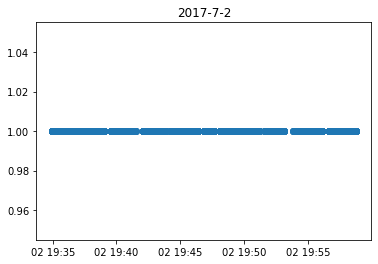

0 days 00:23:51.780804


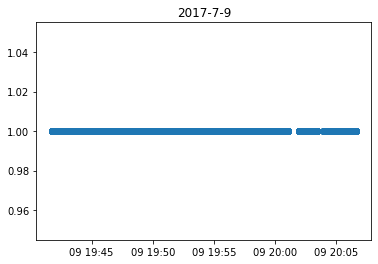

0 days 00:24:51.310633


In [26]:
plot_each_day(Kine_data_Sunday[(Kine_data_Sunday['activity'] == 1)],'date','datetime','activity')

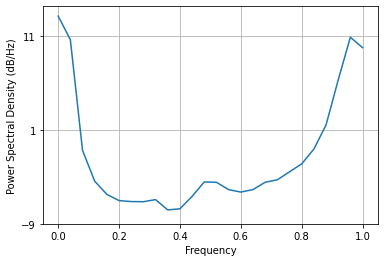

In [27]:
dt = 0.01
plt.psd(Kine_data_Monday[(Kine_data_Monday['activity'] == 1)].acceleration_x, 50)
 
plt.show()

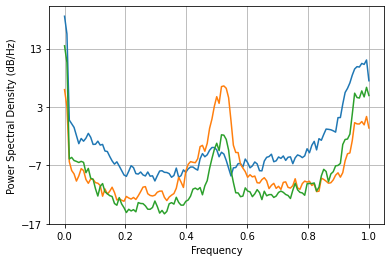

In [36]:

plt.psd(Kine_data_Tuesday[(Kine_data_Tuesday['activity'] == 1)].acceleration_x )
plt.psd(Kine_data_Tuesday[(Kine_data_Tuesday['activity'] == 1)].acceleration_y)
plt.psd(Kine_data_Tuesday[(Kine_data_Tuesday['activity'] == 1)].acceleration_z)
 
plt.show()

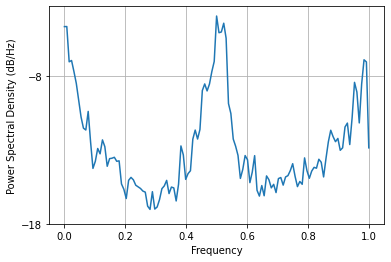

In [29]:
plt.psd(Kine_data_Monday[(Kine_data_Monday['activity'] == 1)].acceleration_z)
 
plt.show()

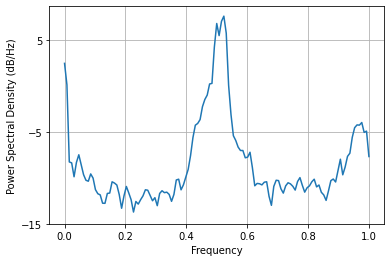

In [30]:
plt.psd(Kine_data_Monday[(Kine_data_Monday['activity'] == 1)].acceleration_y)
 
plt.show()